# Hotel Booking Cancallation Prediction

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

In [3]:
import pandas as pd # Importing the necessary libraries

In [4]:
hotel_df = pd.read_csv('./hotel_bookings.csv') # Loading the data as a dataframe

In [5]:
hotel_df.head() #A quick check to see dataframe loaded properly

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1. Data Pre-processing (25%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

In [6]:
# <<< Your code here >>>
# correlation analysis
correlation_matrix = hotel_df.corr()
print(correlation_matrix)

                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   

Considering all the correlations of different columns with is_cancelled, i decided to remove the following irrelevant columns.

In [7]:
remove_columns = [
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'days_in_waiting_list',
    'company',
    'agent',
    'required_car_parking_spaces'
    ]
#above are the columns ill be removing

#storing the cleaned dataframe into another variable
hotel_df_cleaned = hotel_df.drop(columns=remove_columns) 

hotel_df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,0,C,C,3,No Deposit,Transient,0.0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,...,0,C,C,4,No Deposit,Transient,0.0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,0,A,C,0,No Deposit,Transient,75.0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,0,A,A,0,No Deposit,Transient,75.0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,A,A,0,No Deposit,Transient,98.0,1,Check-Out,2015-07-03


In [8]:
#check for unqiue values to look for similarities
unique_babies = hotel_df_cleaned['babies'].unique()
unique_children = hotel_df_cleaned['children'].unique() 

print(f"the value for babies is {unique_babies} \n \n the value for children is {unique_children}")

the value for babies is [ 0  1  2 10  9] 
 
 the value for children is [ 0.  1.  2. 10.  3. nan]


I noticed that there is a babies and children column. Identifying the unique values in both columns to see if they are similar. Different and some similar values so decided to keep these columns. However, children has some nan values.

## 1.1 Missing Values (10%)

Identify and handle missing values.

In [9]:
# <<< Your code here >>>
# Checking to see the number of Nan values in the children column.
print(f"Number of NaN values in children column is: {hotel_df_cleaned['children'].isna().sum()} out of total values : {hotel_df_cleaned['children'].sum()}")

Number of NaN values in children column is: 4 out of total values : 12403.0


In [10]:
# Remove rows with NaN values in the 'children' column
hotel_df_cleaned = hotel_df_cleaned.dropna(subset=['children'])

print(f"Number of remaining rows after removing NaN values in children: {hotel_df_cleaned.shape[0]}")


Number of remaining rows after removing NaN values in children: 119386


In [11]:
# Check for missing values in other columns

missing_values = hotel_df_cleaned.isna().sum()
print(f"Missing values in each column: {missing_values}")

Missing values in each column: hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
customer_type                       0
adr                                 0
total_of_special_requests           0
reservation_status                  0
reservation_status_date             0
dtype: int64


Output suggests that i only need to look at the values in the country column and decide what i want to do with the missing values.

In [12]:
print(f"{hotel_df_cleaned['country'].count()}") # Looking at the number of values in the country column

118898


Better to drop as we are not gonna be losing alot of data and it will ensure that the data we will be working on is complete.

In [13]:
# Drop rows with NaN in the 'country' column
hotel_df_cleaned = hotel_df_cleaned.dropna(subset=['country'])

## Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

In [14]:

# Look at all the unique values in the dataFrame

for column in hotel_df_cleaned.columns:
    unique_values = hotel_df_cleaned[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'hotel': ['Resort Hotel' 'City Hotel']
Unique values in 'is_canceled': [0 1]
Unique values in 'lead_time': [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99  95  96  69  45  40  15  36  43  70  16 107  47 113  90
  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364 324
  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8 100
  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112  65
  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108 106
  31  87  41 304 117  59  53  58 116  42 321  38 118  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192


From the output i can see some values that need verifying. Like the children and babies values are high sometimes being '10' and some adult values being as high as '55'. Some adr values are also 0 which need checking as this suggests missing data or free stays.

Some values are undefinied for 'distribution_channel' and 'meal'. We need to change them.

## 1.2 Removing Inconsistent values and Outliers (10%)

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'



---
First im gonna focus on the inconsistencies that i identified above. Since meal also contains some `Undefined` data types, im going to replace this categorical data with the mode value or the value that is the most occuring in the dataframe.

In [15]:
mode_channel = hotel_df_cleaned['distribution_channel'].mode().iloc[0] # Stores the first value returned in the array
mode_meal = hotel_df_cleaned['meal'].mode().iloc[0] # Same as above
print(f"Most common distrubution channel is: {mode_channel} \n \n Most common meal is: {mode_meal}")

hotel_df_cleaned['distribution_channel'] = hotel_df_cleaned['distribution_channel'].replace('Undefined', mode_channel) #replacing the values
hotel_df_cleaned['meal'] = hotel_df_cleaned['meal'].replace('Undefined', mode_meal)

Most common distrubution channel is: TA/TO 
 
 Most common meal is: BB


In [16]:
unusual_babies = hotel_df_cleaned[hotel_df_cleaned['babies'] >= 2] # check for high values in babies and children column
print(unusual_babies)

unusual_children = hotel_df_cleaned[hotel_df_cleaned['children'] >= 4]
print(unusual_children)

               hotel  is_canceled  lead_time arrival_date_month  \
264     Resort Hotel            0         21               July   
6719    Resort Hotel            1        116               June   
7896    Resort Hotel            1        345          September   
16677   Resort Hotel            0        174          September   
29906   Resort Hotel            0         47           November   
33332   Resort Hotel            0         31           February   
37302   Resort Hotel            0          1               June   
39634   Resort Hotel            0        247             August   
46619     City Hotel            0         37            January   
78656     City Hotel            0         11            October   
84429     City Hotel            0          1           February   
84591     City Hotel            0          4           February   
94063     City Hotel            0          4               July   
97901     City Hotel            0         11          Septembe

Since the outliers in children and babies on occur once or twice. It is better to remove those data entry points to the dataset clean and more representative of typical bookings.

In [17]:
# Define outliers for babies and children
babies_outliers = hotel_df_cleaned[hotel_df_cleaned['babies'].isin([9, 10])]
children_outliers = hotel_df_cleaned[hotel_df_cleaned['children'] == 10]

# Removing the outliers
hotel_df_cleaned = hotel_df_cleaned.drop(babies_outliers.index).drop(children_outliers.index)


This has removed the outliers in those columns.
Just to check it has been done properly.

In [18]:
print(f"Babies: {hotel_df_cleaned['babies'].unique()} and Children: {hotel_df_cleaned['children'].unique()}")

Babies: [0 1 2] and Children: [0. 1. 2. 3.]


Looks good. Lets now have a look at the adult column.

In [19]:
unusual_adults = hotel_df_cleaned[hotel_df_cleaned['adults'] >= 20] 
print(unusual_adults)

             hotel  is_canceled  lead_time arrival_date_month  \
1539  Resort Hotel            1        304          September   
1587  Resort Hotel            1        333          September   
1643  Resort Hotel            1        336          September   
1752  Resort Hotel            1        340          September   
1884  Resort Hotel            1        347          September   
1917  Resort Hotel            1        349          September   
1962  Resort Hotel            1        352          September   
2003  Resort Hotel            1        354          September   
2164  Resort Hotel            1        361            October   
2173  Resort Hotel            1        338            October   
2228  Resort Hotel            1        328            October   
2418  Resort Hotel            1        334            October   

      stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
1539                        0                     3      40       0.0    

All entries are from Resort Hotel and suggest that these could genuinely be large group of people booking.
This can suggest that people came in as groups for like an event which got cancelled.
I will assign the higher values into their own group categories.

This is an example of binning. Another will be used further down.

In [20]:
# Creating a function to group large adult counts
def classify_group(size):
    if size == 1:
        return 'Single'
    elif size == 2:
        return 'Couple'
    elif 5 <= size <= 10:
        return 'Small Sized Group'
    elif 11 <= size <= 30:
        return 'Medium Sized Group'
    elif size > 30:
        return 'Large Sized Group'
    else:
        return 'Other'

In [21]:
hotel_df_cleaned['group_category'] = hotel_df_cleaned['adults'].apply(classify_group) # Adding the grouping onto the df
hotel_df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date,group_category
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,C,C,3,No Deposit,Transient,0.0,0,Check-Out,2015-07-01,Couple
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,...,C,C,4,No Deposit,Transient,0.0,0,Check-Out,2015-07-01,Couple
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,A,C,0,No Deposit,Transient,75.0,0,Check-Out,2015-07-02,Single
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,A,A,0,No Deposit,Transient,75.0,0,Check-Out,2015-07-02,Single
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,A,A,0,No Deposit,Transient,98.0,1,Check-Out,2015-07-03,Couple


In [22]:
category_counts = hotel_df_cleaned['group_category'].value_counts() # Quick check
print(category_counts)

Couple                89493
Single                22734
Other                  6652
Medium Sized Group        9
Small Sized Group         4
Large Sized Group         3
Name: group_category, dtype: int64


Now lets take a look at incomplete bookings.

In [23]:
incomplete_bookings = hotel_df_cleaned[(hotel_df_cleaned['adults'] == 0) & (hotel_df_cleaned['children'] == 0) & (hotel_df_cleaned['babies'] == 0)] # Selects all rows with 0 adults, children and babies
print(incomplete_bookings)
print(incomplete_bookings.value_counts())

               hotel  is_canceled  lead_time arrival_date_month  \
2224    Resort Hotel            0          1            October   
2409    Resort Hotel            0          0            October   
3181    Resort Hotel            0         36           November   
3684    Resort Hotel            0        165           December   
3708    Resort Hotel            0        165           December   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               June   
115091    City Hotel            0          1               June   
116251    City Hotel            0         44               July   
116534    City Hotel            0          2               July   
117087    City Hotel            0        170               July   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
2224                          0                     3       0       0.0   
2409                          0              

In [24]:
hotel_df_cleaned['incomplete_bookings'] = (hotel_df_cleaned['adults'] == 0) & (hotel_df_cleaned['children'] == 0) & (hotel_df_cleaned['babies'] == 0) & (hotel_df_cleaned['reservation_status'] == 'Check-Out')
hotel_df_cleaned = hotel_df_cleaned[~hotel_df_cleaned['incomplete_bookings']] #Selects all the ones that are not classes as 'incomplete_bookings'

In [25]:

remaining_flags = hotel_df_cleaned[hotel_df_cleaned['incomplete_bookings']] #Quick check to make sure all incomplete bookings have been removed
print(remaining_flags)


Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, customer_type, adr, total_of_special_requests, reservation_status, reservation_status_date, group_category, incomplete_bookings]
Index: []

[0 rows x 27 columns]


I selected all the bookings that were 'incomplete'. I checked for any bookings that have been checked-out and had 0 people including adults and children and babies who stayed.

Now lets see where there are no stays in weekend and week nights.

In [26]:
zero_stays = hotel_df_cleaned[(hotel_df_cleaned['stays_in_week_nights'] == 0) & (hotel_df_cleaned['stays_in_weekend_nights'] == 0)] # Check for 0 stays
print(zero_stays)
print(zero_stays.value_counts())
hotel_df_cleaned['no_stays'] = (hotel_df_cleaned['stays_in_week_nights'] == 0) & (hotel_df_cleaned['stays_in_weekend_nights'] == 0)


               hotel  is_canceled  lead_time arrival_date_month  \
0       Resort Hotel            0        342               July   
1       Resort Hotel            0        737               July   
167     Resort Hotel            0        111               July   
168     Resort Hotel            0          0               July   
196     Resort Hotel            0          8               July   
...              ...          ...        ...                ...   
115483    City Hotel            0         15               July   
117701    City Hotel            0          0             August   
118029    City Hotel            0          0             August   
118631    City Hotel            0         78             August   
118963    City Hotel            0          1             August   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0              

There are 586 entries that have 0 night stayed in week and weekends. This is a significant amount of data which could help imrpove the model. Removing all of this data could cause the model to not perform as well with real data once the model is deployed.

I can remove all entries that have no nights on week and weekends, and the customer eithered checked out or didn't show up. By flagging the ones that had no stay and were cancelled. I can use them to improve model on better cancellation patterns.

In [27]:
# Defining the zero stays
no_stay_condition = (hotel_df_cleaned['stays_in_week_nights'] == 0) & (hotel_df_cleaned['stays_in_weekend_nights'] == 0)
relevant_status = (hotel_df_cleaned['reservation_status'] == 'Check-Out') | (hotel_df_cleaned['reservation_status'] == 'No-Show')

# Removing zero stays entries from the dataframe
hotel_df_cleaned = hotel_df_cleaned[~(no_stay_condition & relevant_status)]

hotel_df_cleaned.head()


,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date,group_category,incomplete_bookings,no_stays
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,0,No Deposit,Transient,75.0,0,Check-Out,2015-07-02,Single,False,False
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,0,No Deposit,Transient,75.0,0,Check-Out,2015-07-02,Single,False,False
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,No Deposit,Transient,98.0,1,Check-Out,2015-07-03,Couple,False,False
5,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,No Deposit,Transient,98.0,1,Check-Out,2015-07-03,Couple,False,False
6,Resort Hotel,0,0,July,0,2,2,0.0,0,BB,...,0,No Deposit,Transient,107.0,0,Check-Out,2015-07-03,Couple,False,False


However, there are still entries in the dataframe where the reservation_status is 'canceled' as they are valid data points. This is because it is very much possible for a booking to be canceled with the customer not having spent any nights. I can use that data to help improve my model but allowing it to learn patterns related to it. 

## 1.3 Column data type conversion (5%)

All necessary columns should be correctly converted to appropriate data types.


In [28]:
# <<< Your code here >>>
print(hotel_df_cleaned.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
customer_type                      object
adr                               float64
total_of_special_requests           int64
reservation_status                

The more clearer ones that need changing are the reservation_status_date and children.

However, there are many object types can be changed to caterogries to help improve speed and make the code more memory-efficient.

In [29]:
hotel_df_cleaned['children'] = hotel_df_cleaned['children'].astype('int64')
hotel_df_cleaned['reservation_status_date'] = pd.to_datetime(hotel_df_cleaned['reservation_status_date'])

categorical_columns = [
    'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 
    'customer_type', 'reservation_status', 'group_category'
]
for col in categorical_columns:
    hotel_df_cleaned[col] = hotel_df_cleaned[col].astype('category')

In [30]:
print(hotel_df_cleaned.dtypes)

hotel                                   category
is_canceled                                int64
lead_time                                  int64
arrival_date_month                        object
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type                      category
booking_changes                            int64
deposit_type                            category
customer_type       

# 2. Exploratory Data Analysis (25%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.


Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts
* Heatmaps

## 2.1. Calculating cancellation percentages for City and Resort hotels.

hotel
City Hotel      41.913610
Resort Hotel    28.231154
Name: is_canceled, dtype: float64


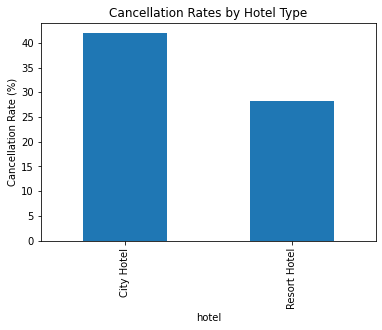

In [31]:
# <<< Your code here >>>
import matplotlib.pyplot as plt

cancellation_rates = hotel_df_cleaned.groupby('hotel')['is_canceled'].mean() * 100
print(cancellation_rates)

cancellation_rates.plot(kind='bar', title='Cancellation Rates by Hotel Type', ylabel='Cancellation Rate (%)')
plt.show()


The bar graph clearly shows that the city hotel has more canceled bookings compared to the resort hotel.

## 2.2. Identifying the most frequently ordered meal types.

BB    92445
HB    14356
SC    10512
FB      797
Name: meal, dtype: int64


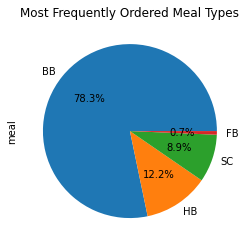

In [32]:
# <<< Your code here >>>
meal_counts = hotel_df_cleaned['meal'].value_counts()
print(meal_counts)

meal_counts.plot(kind='pie', title='Most Frequently Ordered Meal Types', autopct='%1.1f%%')
plt.show()


Information from this Pie Chart shows us that the meal type `BB` is the most frequently ordered meal type. With the meal type `FB` being the least ordered meal type.

## 2.3. Determining the number of returning guests.

Number of returning guests by hotel type:
hotel
City Hotel      1834
Resort Hotel    1664
Name: is_repeated_guest, dtype: int64


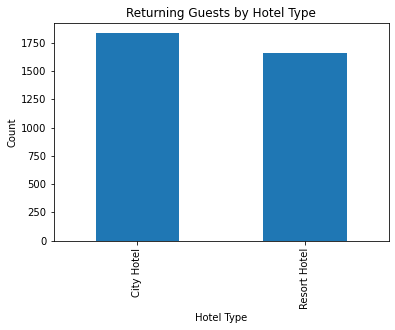

In [33]:
# <<< Your code here >>>
returning_guests_by_hotel = hotel_df_cleaned.groupby('hotel')['is_repeated_guest'].sum() # Group by hotel and calculate sum of returning guests

# Print the number of returning guests for each hotel type
print(f'Number of returning guests by hotel type:\n{returning_guests_by_hotel}')

# Plot the counts for each hotel type
returning_guests_by_hotel.plot(kind='bar', title='Returning Guests by Hotel Type', xlabel='Hotel Type', ylabel='Count')
plt.show()


This bar graph clearly shows the number of returning guests for both the City Hotel and Resort Hotel. The bar graph shows that City Hotel has more returning guests.

## 2.4. Discovering the most booked room types.

A    85021
D    19068
E     6451
F     2872
G     2063
B     1107
C      923
H      597
L        6
P        2
Name: reserved_room_type, dtype: int64


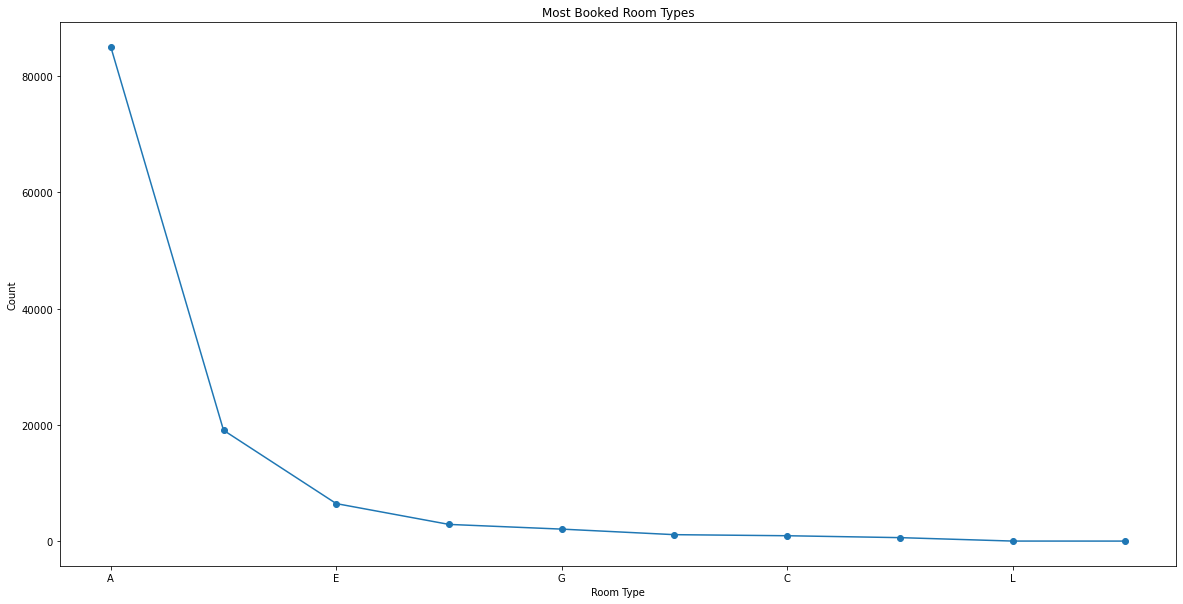

In [34]:
room_type_counts = hotel_df_cleaned['reserved_room_type'].value_counts()
print(room_type_counts)

# Plot the counts as a line chart
plt.figure(figsize=(20, 10))
room_type_counts.plot(kind='line', title='Most Booked Room Types', ylabel='Count', marker='o')  # Adding title and markers on the graph

plt.xlabel('Room Type')

plt.show()


The line graph shows the number of times each room has been booked, clearly showing that A is the most popular.

## 2.5. Exploring correlations between room types and cancellations.

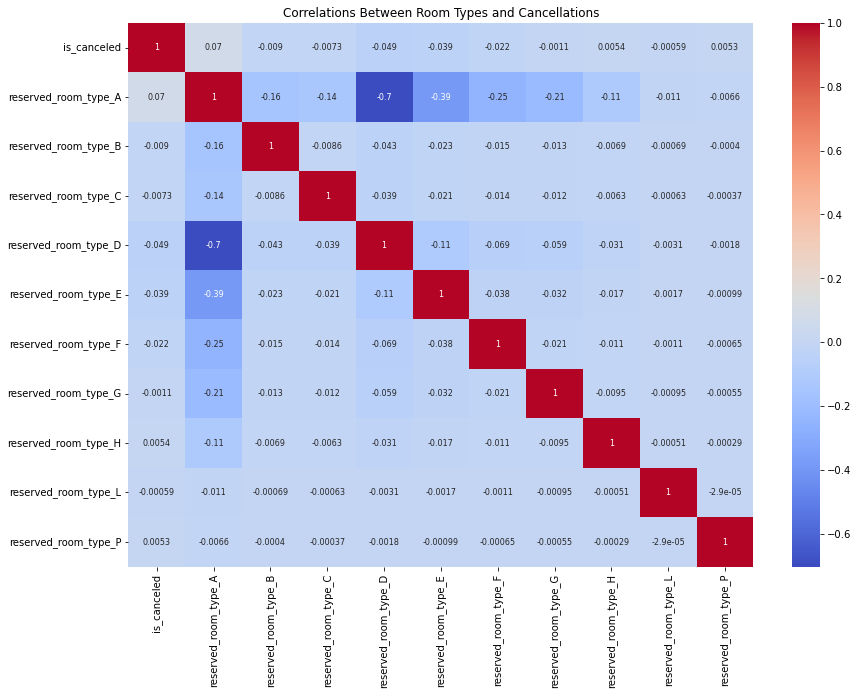

In [35]:
import seaborn as sns

# Creating the correlation matrix
corr_matrix = hotel_df_cleaned[['reserved_room_type', 'is_canceled']].copy()
corr_matrix = pd.get_dummies(corr_matrix, columns=['reserved_room_type'])
correlations = corr_matrix.corr()


# Making the heatmap bigger
plt.figure(figsize=(14, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', annot_kws={"size": 8})

# Adding title
plt.title('Correlations Between Room Types and Cancellations')
plt.show()


Shows the correlation between the reserved room types and the probability of it being cancelled. Room A being the more popular has a higher correlation or chance of being canceled.

# 3. Feature Engineering (20%)


---





Apply various feature engineering techniques, covered in the lectures and practicals.

Hint:
* Binning
* Encoding
* Scaling
* Feature selection

## 3.1. Binning

In [36]:

# Defining a mapping for months to seasons to perform binnig
season_mapping = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Autumn',
    'October': 'Autumn', 'November': 'Autumn', 'December': 'Winter'
}

# Map the 'arrival_date_month' column to seasons
hotel_df_cleaned['arrival_season'] = hotel_df_cleaned['arrival_date_month'].map(season_mapping)

Binning `arrival_date_month` is a good choice:
- as it reduces the categories from 12 months to 4 seasons.
- improves data interpretability
- could reveal different cancellation behaviours by season improving model performance
- noise reduction leading to stable predictions

## 3.2. Encoding

In [37]:
# <<< Your code here >>>
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Encoding the entire dataset before splitting

# Applying cat codes for 'reserved_room_type', 'assigned_room_type', 'arrival_season'
hotel_df_cleaned['reserved_room_type_encoded'] = hotel_df_cleaned['reserved_room_type'].astype('category').cat.codes
hotel_df_cleaned['assigned_room_type_encoded'] = hotel_df_cleaned['assigned_room_type'].astype('category').cat.codes
hotel_df_cleaned['arrival_season_encoded'] = hotel_df_cleaned['arrival_season'].astype('category').cat.codes


# Apply one-hot encoding for categorical variables with fewer unique values
hotel_df_cleaned = pd.get_dummies(hotel_df_cleaned, columns=['meal', 'customer_type'], drop_first=True)

# Ordinal encoding for 'group_category' and 'deposit_type'
group_category_order = ['Other', 'Single', 'Couple', 'Small Sized Group', 'Medium Sized Group', 'Large Sized Group']
group_category_encoder = OrdinalEncoder(categories=[group_category_order])
hotel_df_cleaned['group_category_encoded'] = group_category_encoder.fit_transform(hotel_df_cleaned[['group_category']])

deposit_type_order = [['No Deposit', 'Refundable', 'Non Refund']]
deposit_type_encoder = OrdinalEncoder(categories=deposit_type_order)
hotel_df_cleaned['deposit_type_encoded'] = deposit_type_encoder.fit_transform(hotel_df_cleaned[['deposit_type']])

# Binary encoding for 'hotel'
hotel_df_cleaned['hotel_encoded'] = hotel_df_cleaned['hotel'].apply(lambda x: 1 if x == 'Resort Hotel' else 0)

# Target encoding for 'country'
y = hotel_df_cleaned['is_canceled']
country_mean = y.groupby(hotel_df_cleaned['country']).mean()
hotel_df_cleaned['country_encoded'] = hotel_df_cleaned['country'].map(country_mean)


- Encoding the entire dataframe before splitting allows for consistency in my data and allows for a simplified workflow making it easy for me to manage the data transformations.

- I performed cat codes on `reserved_room_type`, `assigned_room_type` and `arrival_season` instead of something like one-hot encoding is because:
    -  It reduces dimensionality 
    - Which makes it more memory-intensive than one-hot encoding. Especially as some columns as such `assigned_room_type` contain many unique values.
    - Makes my dataframe more simple and simplifies the model input 

- I performed ordinal encoding on `group_category` as there is a clear order in this categorical data with the amount of adults.
- I also performed ordinal encoding on `Desposit_type` as there is a clear order in this categorical data with the amount of money.
    - This helps to reduce dimensionality compared to one-hot encoding.
    - This can lead to faster model training and lower memory usage.
    - It also helps the model understand the importance of each value in the category. Potentially improve predictive performance.

- `hotel` only contains 2 unique values making binary encoding the perfect and the most simplest choice.

- I used Target encoding for the `country` column because:
    - due to many unique values in the column, target encoding effectively manages high cardinality without losing the important information we could extract from the column.
    - it reduces dimensionality compared to one-hot encoding as this column contains many unique values.
    - lastly, it captures the relationship between the `country` feature and the `is_canceled` feature by using the mean cancellation rate for each country. Retaining his valauble information could enhance the model's predictive power.

In [38]:

pd.set_option('display.max_columns', None)


In [39]:
hotel_df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,adr,total_of_special_requests,reservation_status,reservation_status_date,group_category,incomplete_bookings,no_stays,arrival_season,reserved_room_type_encoded,assigned_room_type_encoded,arrival_season_encoded,meal_FB,meal_HB,meal_SC,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,group_category_encoded,deposit_type_encoded,hotel_encoded,country_encoded
2,Resort Hotel,0,7,July,0,1,1,0,0,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,75.0,0,Check-Out,2015-07-02,Single,False,False,Summer,0,2,2,0,0,0,0,1,0,1.0,0.0,1,0.202794
3,Resort Hotel,0,13,July,0,1,1,0,0,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,75.0,0,Check-Out,2015-07-02,Single,False,False,Summer,0,0,2,0,0,0,0,1,0,1.0,0.0,1,0.202794
4,Resort Hotel,0,14,July,0,2,2,0,0,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,98.0,1,Check-Out,2015-07-03,Couple,False,False,Summer,0,0,2,0,0,0,0,1,0,2.0,0.0,1,0.202794
5,Resort Hotel,0,14,July,0,2,2,0,0,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,98.0,1,Check-Out,2015-07-03,Couple,False,False,Summer,0,0,2,0,0,0,0,1,0,2.0,0.0,1,0.202794
6,Resort Hotel,0,0,July,0,2,2,0,0,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,107.0,0,Check-Out,2015-07-03,Couple,False,False,Summer,2,2,2,0,0,0,0,1,0,2.0,0.0,1,0.573600


In [40]:
columns_to_drop = ['hotel', 'country', 'deposit_type', 'reservation_status_date', 'group_category', 'reserved_room_type', 'assigned_room_type', 'arrival_date_month']
hotel_df_cleaned.drop(columns=columns_to_drop, inplace=True)

In [41]:
hotel_df_cleaned.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,total_of_special_requests,reservation_status,incomplete_bookings,no_stays,arrival_season,reserved_room_type_encoded,assigned_room_type_encoded,arrival_season_encoded,meal_FB,meal_HB,meal_SC,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,group_category_encoded,deposit_type_encoded,hotel_encoded,country_encoded
2,0,7,0,1,1,0,0,Direct,Direct,0,0,0,0,75.0,0,Check-Out,False,False,Summer,0,2,2,0,0,0,0,1,0,1.0,0.0,1,0.202794
3,0,13,0,1,1,0,0,Corporate,Corporate,0,0,0,0,75.0,0,Check-Out,False,False,Summer,0,0,2,0,0,0,0,1,0,1.0,0.0,1,0.202794
4,0,14,0,2,2,0,0,Online TA,TA/TO,0,0,0,0,98.0,1,Check-Out,False,False,Summer,0,0,2,0,0,0,0,1,0,2.0,0.0,1,0.202794
5,0,14,0,2,2,0,0,Online TA,TA/TO,0,0,0,0,98.0,1,Check-Out,False,False,Summer,0,0,2,0,0,0,0,1,0,2.0,0.0,1,0.202794
6,0,0,0,2,2,0,0,Direct,Direct,0,0,0,0,107.0,0,Check-Out,False,False,Summer,2,2,2,0,0,0,0,1,0,2.0,0.0,1,0.573600


In [42]:
print(f"Unique for market_segment: {hotel_df_cleaned['market_segment'].unique()} \n Unique for distribution_channel: {hotel_df_cleaned['distribution_channel'].unique()}")

Unique for market_segment: ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Aviation']
Categories (7, object): ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA'] 
 Unique for distribution_channel: ['Direct', 'Corporate', 'TA/TO', 'GDS']
Categories (4, object): ['Corporate', 'Direct', 'GDS', 'TA/TO']


In [43]:
# encoding 'market_segment'
hotel_df_cleaned['market_segment_encoded'] = hotel_df_cleaned['market_segment'].astype('category').cat.codes

# encoding 'distribution_channel' 
hotel_df_cleaned['distribution_channel_encoded'] = hotel_df_cleaned['distribution_channel'].astype('category').cat.codes


In [44]:
hotel_df_cleaned.drop(columns=['market_segment', 'distribution_channel'], inplace=True) #dropping columns

In [45]:
hotel_df_cleaned.drop(columns='arrival_season', inplace=True)

In [46]:
hotel_df_cleaned.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,total_of_special_requests,reservation_status,incomplete_bookings,no_stays,reserved_room_type_encoded,assigned_room_type_encoded,arrival_season_encoded,meal_FB,meal_HB,meal_SC,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,group_category_encoded,deposit_type_encoded,hotel_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded
2,0,7,0,1,1,0,0,0,0,0,0,75.0,0,Check-Out,False,False,0,2,2,0,0,0,0,1,0,1.0,0.0,1,0.202794,3,1
3,0,13,0,1,1,0,0,0,0,0,0,75.0,0,Check-Out,False,False,0,0,2,0,0,0,0,1,0,1.0,0.0,1,0.202794,2,0
4,0,14,0,2,2,0,0,0,0,0,0,98.0,1,Check-Out,False,False,0,0,2,0,0,0,0,1,0,2.0,0.0,1,0.202794,6,3
5,0,14,0,2,2,0,0,0,0,0,0,98.0,1,Check-Out,False,False,0,0,2,0,0,0,0,1,0,2.0,0.0,1,0.202794,6,3
6,0,0,0,2,2,0,0,0,0,0,0,107.0,0,Check-Out,False,False,2,2,2,0,0,0,0,1,0,2.0,0.0,1,0.573600,3,1


Again i used Cat codes for `market_segment` and `distribution_channel` as:
    - it reduces dimensionality which is less memory-intensive than one-hot encoding.
    - Simplifies my dataframe and the model input making it easier to handle.

Dropped all the categorical columns before moving onto Scaling as they have all been encoded.

## 3.3. Scaling

In [47]:
# <<< Your code here >>>
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Splitting the data
X = hotel_df_cleaned.drop(columns=['is_canceled'])
y = hotel_df_cleaned['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Dropping reservation_status 
X_train.drop(columns=['reservation_status'], inplace=True)

# Scaling
columns_to_scale = ['adr', 'lead_time']
min_max_columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_train[min_max_columns] = min_max_scaler.fit_transform(X_train[min_max_columns])



In [48]:
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_test[min_max_columns] = min_max_scaler.transform(X_test[min_max_columns])
X_test.drop(columns=['reservation_status'], inplace=True)

Splitting data before Scaling is a good decision because:
    - It prevents data leakage as we ensure that information from the test set does not influence the training process. 
        - Leading to more reliable model evalutions.
    - Scaling after splitting ensures that the scaling parameters are derived solely from the training data which helps maintain the integrity of the test data.
    - Mimics Real-World Scenarios as the model will be used on unseen data so training the model on the training data and then testing the model on the testing data will simulate how the model will perform in real-world situations.

Divided the data into 70% training and 30% testing subsets.

I performed Standard Scaling on `adr` and `lead_time` columns because:
    - It improves interpretability as when features are on a similar scale, it becomes easier to compare their effects on the model's predictions. 
    - Since columns such as `lead_time` have such big ranges, standard scaling *normalizes* them to a common scale with a mean of 0 and standard deviation of 1.

I performed Min-Max Scaling on `stays_in_weekend_nights`, `stays_in_week_nights` and `total_of_special_requests` because:
    - it improves interpretability by scaling these features to a standard range it simplifies the understanding of their contribution to the model.

By using `.fit_transform` and `.transform` I ensure that both the training and testing subsets are scaled identically.

In [49]:
X_train.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,total_of_special_requests,incomplete_bookings,no_stays,reserved_room_type_encoded,assigned_room_type_encoded,arrival_season_encoded,meal_FB,meal_HB,meal_SC,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,group_category_encoded,deposit_type_encoded,hotel_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded
15431,0.434559,0.1250,0.100,2,2,0,0,0,0,1,0.405364,0.6,False,False,6,6,2,0,0,0,0,1,0,2.0,0.0,1,0.222767,6,3
107720,-0.323263,0.0625,0.075,1,0,0,0,0,0,1,-0.546296,0.0,False,False,0,0,1,0,0,1,0,1,0,1.0,0.0,0,0.186123,6,3
32355,-0.912680,0.0625,0.000,1,0,0,0,0,0,0,-1.170272,0.0,False,False,0,3,3,0,0,0,0,1,0,1.0,0.0,1,0.573600,6,3
116501,-0.931392,0.0000,0.025,2,1,0,0,0,0,1,2.283177,0.2,False,False,3,3,2,0,0,0,0,1,0,2.0,0.0,0,0.198748,6,3
91235,0.425203,0.0000,0.075,2,0,0,0,0,0,0,-0.248044,0.2,False,False,0,0,2,0,1,0,0,0,1,2.0,0.0,0,0.573600,5,3


## 3.4. Feature selection

In [50]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Initialising random forest classifier
rf = RandomForestClassifier(random_state=42)

# Fiting the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance


for i in range(X_train.shape[1]):
    print(f"{i + 1}. Feature {X_train.columns[indices[i]]} ({importances[indices[i]]})")


1. Feature lead_time (0.17614899129874448)
2. Feature country_encoded (0.14049093549026584)
3. Feature adr (0.12434773506161123)
4. Feature deposit_type_encoded (0.11478791712621071)
5. Feature total_of_special_requests (0.06126167571200439)
6. Feature market_segment_encoded (0.05392426040063929)
7. Feature stays_in_week_nights (0.05079904191656102)
8. Feature previous_cancellations (0.03647918893121909)
9. Feature arrival_season_encoded (0.03265203300407846)
10. Feature stays_in_weekend_nights (0.030914248366944914)
11. Feature assigned_room_type_encoded (0.029831182893246207)
12. Feature booking_changes (0.023790776389821914)
13. Feature reserved_room_type_encoded (0.018008263756818344)
14. Feature customer_type_Transient (0.01631601633318102)
15. Feature distribution_channel_encoded (0.012869956092533196)
16. Feature customer_type_Transient-Party (0.012572789253151194)
17. Feature hotel_encoded (0.012124232046618921)
18. Feature adults (0.009540334112189764)
19. Feature group_catego

In [51]:
# Choosing threshold for feature selection
importance_threshold = 0.01

# Getting the selected features
selected_features = X_train.columns[rf.feature_importances_ > importance_threshold]

# Creating a new DataFrame with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("Selected features based on importance:")
print(selected_features)


Selected features based on importance:
Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'previous_cancellations', 'booking_changes', 'adr',
       'total_of_special_requests', 'reserved_room_type_encoded',
       'assigned_room_type_encoded', 'arrival_season_encoded',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'deposit_type_encoded', 'hotel_encoded', 'country_encoded',
       'market_segment_encoded', 'distribution_channel_encoded'],
      dtype='object')


Random Forests are known for their ability to ahndle high-dimensional datasets and are less prone to overfitting. This makes it a reliable choice for feature importance evaluation. It helps to provide and quantify the contribution of each feature to the model's predictions. 

After getting the importance of each feature, I selected a feature threshold only allowing features with an importance of more than `0.01` to be selected and used to train the model. This helps in simplifying the model and reducing noise from less important features which can improve model performance.

I then created a new dataframe for training and testing with only the selected features.

# 4. Classifier Training (20%)


---


Utilise the sklearn Python library to train a ML model (e.g.decision tree classifier). Your process should start with splitting your dataset into input features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train your model on the training dataset and evaluate using test dataset with appropriate metrics. Aim to achieve higher accuracy e.g. more than 70% accuracy using your model.

## 4.1. Data Splitting (5%)

In [52]:
# <<< Your code here >>>

# Performed above just before scaling.

The data was split into training and test sets with stratification to ensure balanced representation of classes. Stratification was applied to maintain class distribution, preventing bias and ensuring that performance metrics reflect real-world data distribution. This approach strengthens model reliability, especially for imbalanced datasets.

## 4.2. Model Training (10%)

In [53]:
# <<< Your code here >>>
# Defining the model again and fitting selected features
rf_refined = RandomForestClassifier(random_state=42)
rf_refined.fit(X_train_selected, y_train)

# Evaluate the refined model
y_pred_refined = rf_refined.predict(X_test_selected)

from sklearn.metrics import accuracy_score, classification_report

accuracy_refined = accuracy_score(y_test, y_pred_refined)
print(f"Refined Model Accuracy: {accuracy_refined:.2f}")
print(classification_report(y_test, y_pred_refined))



Refined Model Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22191
           1       0.87      0.79      0.82     13242

    accuracy                           0.87     35433
   macro avg       0.87      0.86      0.86     35433
weighted avg       0.87      0.87      0.87     35433



I choose the random forest classifier was selected as the primary model for its robustness in handling feature importance and interpretability. Random forest is also suitable for high dimensional data. To complement this model, Logistic regression and Gradient Boosting were also evaluated as benchmarks for simpler and more complex modeling strategies, respectively.

In [54]:
from sklearn.model_selection import GridSearchCV


# Defining the model
rf = RandomForestClassifier(random_state=42)

# Specifying the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_features': ['sqrt', 'log2'],  
    'max_depth': [None, 10, 20, 30],   
    'min_samples_split': [2, 5, 10],    
    'min_samples_leaf': [1, 2, 4]        
}

# Defining GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_selected, y_train)

# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score:  0.8703266930343384


To refine the model performance, a GridSearchCV was implement on the Random Forest Classifier to identify optimal hyperparameters. A range of values was test for `n_estimators`, `max_features`, `max_depth`, `min_samples_split` and `min_samples_leaf`. The GridSearchCV was set to a 3-fold cross validation to ensure generalisable results, ultimately identifying the best configuration to balance between model accuracy and complexity. The hyperparameter tuning improved model performance and validated the choice of optimal parameters.

The output shows me that the RandomForestClassifier achieved a best cross-validated accuracy score of approximately 87.03% with the following optimal parameters:
- `max_depth` = 30
- `max_features` = sqrt
- `min_samples_leaf` = 1
- `min_samples_split` = 5
- `n_estimators` = 20

The results show that these parameters provide an effective balance between model complexity and generalisability. Therefore, optimising the model's predictive performance across the cross-validation folds without excessive overfitting. With a best score of 87.03%, the model is produccing consistent and robust results on unseen data.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Defining the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Training the model
log_reg.fit(X_train_selected, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_selected)

# Evaluate the model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     22191
           1       0.80      0.61      0.69     13242

    accuracy                           0.80     35433
   macro avg       0.80      0.76      0.77     35433
weighted avg       0.80      0.80      0.79     35433



In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Defining the model
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train_selected, y_train)

# Make predictions
y_pred_gbm = gbm.predict(X_test_selected)

# Evaluate the model
print(f"Gradient Boosting Model Accuracy: {accuracy_score(y_test, y_pred_gbm):.2f}")
print(classification_report(y_test, y_pred_gbm))


Gradient Boosting Model Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     22191
           1       0.81      0.72      0.77     13242

    accuracy                           0.84     35433
   macro avg       0.83      0.81      0.82     35433
weighted avg       0.83      0.84      0.83     35433



Each model's performance was evaluated using accuracy and classification metrics including precision, recall, and F1-score. 

- Gradient Boosting model:
    - achieved an accuracy of 84%
    - with high percision of 85%
    - recall for non-cancellations of 90%
    - lower precision (81%) and recall (72%) for cancellations
    - Weighted F1-score of 83% indicates robust performance
    - especially in accuractely identifying non-cancellations
    - some challenges remain in identifying cancellations

- Logistic Regression model:
    - overall accuracy of 80%
    - for non-cancellations it achieved a precision of 80%
    - recall of 91%
    - for cancellations the recall was 61% which is alot lower
    - weighted F1-score of 79%
    - This simpler linear model is less effective in identifying cancellations

## 4.3. Model Evaluation (5%)

In [57]:
# <<< Your code here >>>
# Defining another RFC with the best parameters
best_rf = RandomForestClassifier(
    max_depth=30,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Fit the model on the training data
best_rf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test_selected)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Test Accuracy as a percentage: ", round(accuracy_score(y_test, y_pred) * 100), "%")
print(classification_report(y_test, y_pred))



Test Accuracy:  0.8740439703101628
Test Accuracy as a percentage:  87 %
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22191
           1       0.87      0.78      0.82     13242

    accuracy                           0.87     35433
   macro avg       0.87      0.85      0.86     35433
weighted avg       0.87      0.87      0.87     35433



After further parameter tuning such as `max_features`, `max_depth` and `min_samples_split` while maintaing `n_estimators` at 200, the model demonstrated a refined balance of complexity and generalisibility. This version remains accurate and interpretable, making it valuable for real-world application whilst effectively leveraging data insights for improved cancelled predictions.

Non-cancellations remains strong at 88% and recall is high at 93% indicating the model's reliable performance in identifying non-cancelled bookings accurately.

Cancellations has a high precision of 87% and a recall of 78% reflecting a minor improvent in precision compared to the original model, which has a similar recall.

The F1-scores align closely with the precision and recall values, with the macros and weighted averages at 86% and 87%. This balance indicates strong overall perofrmance, suggesting that the model is robust across classes, providing good predicitve reliability for both cancellations and non-cancellations.

In [58]:
from sklearn.model_selection import cross_val_score

# Performing k-fold cross-validation
cv_scores = cross_val_score(rf, X_train_selected, y_train, cv=5)

# Printing the scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.87209724 0.86744074 0.87281524 0.87493196 0.87342002]
Mean CV Score: 0.8721410397583581


The stability across folds suggests minimal overfitting and supports the model's robutness. Achieving an average accuracy close to 87.2% on the training set reinforces confidence in the model's ability to main similar predivtive accuracy when deployed, making it well-suited for pratical real-life scenarios.

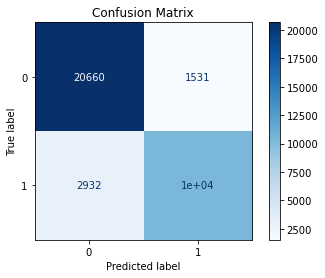

In [59]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Making the predictions
y_pred = grid_search.predict(X_test_selected)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # 0 = not canceled, 1 = canceled
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

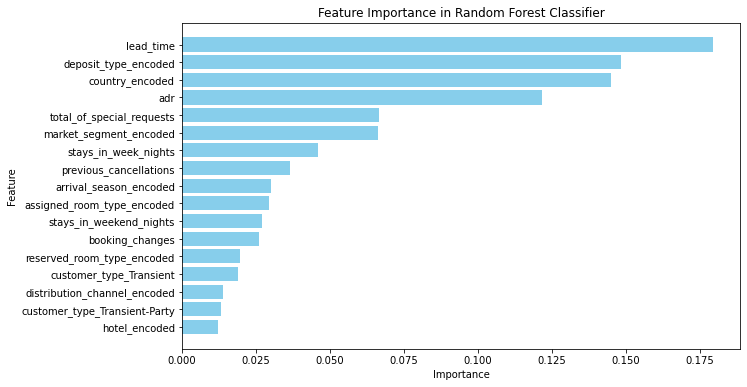

                          Feature  Importance
0                       lead_time    0.179525
12           deposit_type_encoded    0.148314
14                country_encoded    0.144865
5                             adr    0.121686
6       total_of_special_requests    0.066490
15         market_segment_encoded    0.066127
2            stays_in_week_nights    0.045821
3          previous_cancellations    0.036345
9          arrival_season_encoded    0.030023
8      assigned_room_type_encoded    0.029557
1         stays_in_weekend_nights    0.027111
4                 booking_changes    0.026193
7      reserved_room_type_encoded    0.019701
10        customer_type_Transient    0.019045
16   distribution_channel_encoded    0.013776
11  customer_type_Transient-Party    0.013300
13                  hotel_encoded    0.012122


In [60]:
# <<< Your code here >>>
import pandas as pd
import matplotlib.pyplot as plt

# Fit the RandomForestClassifier
best_rf.fit(X_train_selected, y_train)

# Extracting feature importances
feature_importances = best_rf.feature_importances_

# Creating a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Ploting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# Printing the sorted feature importance DataFrame
print(feature_importance_df)


Top 3 contributing features:
- `lead_time` : this makes sense as longer lead times may increase the uncertainty or likelihood of cancellations. Dominance of this feature is a good sign, suggesting that the model is capturing a key variable for cancellations.

- `deposit_type_encoded` : this is to be expected as customers who do not make a deposit might be more likely to cancel their booking.

- `country_encoded` : geographical location can also a big factor when considering booking cancellations. Different factors like weather could cause a customer unable to travel making them cancel their booking.

##### Reliability of the model:

- Features like `lead_time`, `deposit_type` and `country` are highly dominating features. This can be good and provide us with reliable predictions when these values are well defined, however the model might struggle if there is variability in these key features.

- Some features make very little contribution such as `hotel_encoded` and `distribution_channel_encoded` suggesting that they may not be relevent and could be causing overfitting.

- The feature importance scores make it easy to understand how the model is making decisions. This clarity is important as it helps us trust the model's predictions. Features with high dominance clearly are some of the more major factors in real-life situations which could lead to potential cancellations.

---